Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 50_000
R = 5_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:17:44 2025 +0100) (511.23ms ela...,0.906,0.0211,0.466,1.25,0.30,18.59,62.50 C,Nominal
1,(Sun Mar 23 10:17:45 2025 +0100) (505.71ms ela...,1.830,0.0431,0.500,2.28,0.47,26.24,62.50 C,Nominal
2,(Sun Mar 23 10:17:45 2025 +0100) (505.74ms ela...,5.640,0.1150,1.010,6.68,1.13,57.83,62.07 C,Nominal
3,(Sun Mar 23 10:17:46 2025 +0100) (506.17ms ela...,6.940,0.0429,0.776,7.89,1.31,99.88,62.07 C,Nominal
4,(Sun Mar 23 10:17:46 2025 +0100) (506.01ms ela...,4.230,0.0000,0.780,4.93,0.91,75.85,61.64 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(412, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:17:55 2025 +0100) (108.92ms ela...,35.6,0.0000,1.76,36.78,3.81,96.25,60.12 C,Nominal
1,(Sun Mar 23 10:17:55 2025 +0100) (106.93ms ela...,41.0,0.1060,2.21,42.53,3.98,99.69,60.12 C,Nominal
2,(Sun Mar 23 10:17:55 2025 +0100) (105.53ms ela...,41.4,0.0995,1.71,44.21,3.98,99.58,60.12 C,Nominal
3,(Sun Mar 23 10:17:56 2025 +0100) (105.08ms ela...,40.9,0.1020,1.02,44.58,4.00,99.98,60.12 C,Nominal
4,(Sun Mar 23 10:17:56 2025 +0100) (105.79ms ela...,41.1,0.0808,1.19,44.93,3.98,99.62,60.12 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:14:38 2025 +0100) (512.30ms ela...,6.60,0.022600,0.583,7.16,0.92,58.00,49.16 C,Nominal
1,(Sun Mar 23 10:14:39 2025 +0100) (507.96ms ela...,14.90,0.109000,1.320,16.59,1.82,74.08,49.16 C,Nominal
2,(Sun Mar 23 10:14:39 2025 +0100) (507.94ms ela...,4.44,0.075700,0.911,5.37,1.00,54.46,49.73 C,Nominal
3,(Sun Mar 23 10:14:40 2025 +0100) (507.95ms ela...,2.19,0.060800,0.780,3.01,0.73,43.79,49.73 C,Nominal
4,(Sun Mar 23 10:14:40 2025 +0100) (506.21ms ela...,2.31,0.000482,0.514,2.71,0.42,27.74,49.69 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(482, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:14:49 2025 +0100) (108.56ms ela...,24.1,0.0000,0.625,24.91,3.43,94.46,49.80 C,Nominal
1,(Sun Mar 23 10:14:49 2025 +0100) (104.93ms ela...,23.8,0.1110,1.130,24.93,3.39,97.57,49.80 C,Nominal
2,(Sun Mar 23 10:14:49 2025 +0100) (105.08ms ela...,24.6,0.1280,1.810,26.03,2.98,96.61,49.80 C,Nominal
3,(Sun Mar 23 10:14:49 2025 +0100) (106.54ms ela...,23.9,0.0155,1.640,26.66,2.62,95.79,49.80 C,Nominal
4,(Sun Mar 23 10:14:49 2025 +0100) (105.93ms ela...,20.6,0.2220,1.480,24.17,2.20,95.86,49.80 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:17:44,0.906,0.0211,0.466,1.25,0.30,18.59,62.50,Nominal,511.23
1,2025-03-23 10:17:45,1.830,0.0431,0.500,2.28,0.47,26.24,62.50,Nominal,505.71
2,2025-03-23 10:17:45,5.640,0.1150,1.010,6.68,1.13,57.83,62.07,Nominal,505.74
3,2025-03-23 10:17:46,6.940,0.0429,0.776,7.89,1.31,99.88,62.07,Nominal,506.17
4,2025-03-23 10:17:46,4.230,0.0000,0.780,4.93,0.91,75.85,61.64,Nominal,506.01


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(412, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:17:55,35.6,0.0000,1.76,36.78,3.81,96.25,60.12,Nominal,108.92
1,2025-03-23 10:17:55,41.0,0.1060,2.21,42.53,3.98,99.69,60.12,Nominal,106.93
2,2025-03-23 10:17:55,41.4,0.0995,1.71,44.21,3.98,99.58,60.12,Nominal,105.53
3,2025-03-23 10:17:56,40.9,0.1020,1.02,44.58,4.00,99.98,60.12,Nominal,105.08
4,2025-03-23 10:17:56,41.1,0.0808,1.19,44.93,3.98,99.62,60.12,Nominal,105.79


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:14:38,6.60,0.022600,0.583,7.16,0.92,58.00,49.16,Nominal,512.30
1,2025-03-23 10:14:39,14.90,0.109000,1.320,16.59,1.82,74.08,49.16,Nominal,507.96
2,2025-03-23 10:14:39,4.44,0.075700,0.911,5.37,1.00,54.46,49.73,Nominal,507.94
3,2025-03-23 10:14:40,2.19,0.060800,0.780,3.01,0.73,43.79,49.73,Nominal,507.95
4,2025-03-23 10:14:40,2.31,0.000482,0.514,2.71,0.42,27.74,49.69,Nominal,506.21


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(482, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:14:49,24.1,0.0000,0.625,24.91,3.43,94.46,49.8,Nominal,108.56
1,2025-03-23 10:14:49,23.8,0.1110,1.130,24.93,3.39,97.57,49.8,Nominal,104.93
2,2025-03-23 10:14:49,24.6,0.1280,1.810,26.03,2.98,96.61,49.8,Nominal,105.08
3,2025-03-23 10:14:49,23.9,0.0155,1.640,26.66,2.62,95.79,49.8,Nominal,106.54
4,2025-03-23 10:14:49,20.6,0.2220,1.480,24.17,2.20,95.86,49.8,Nominal,105.93


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


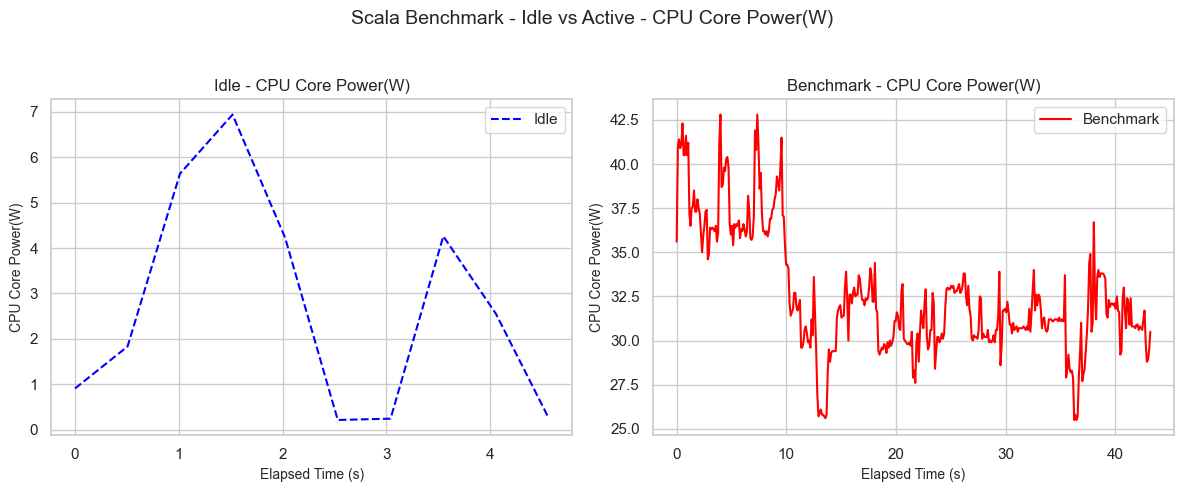

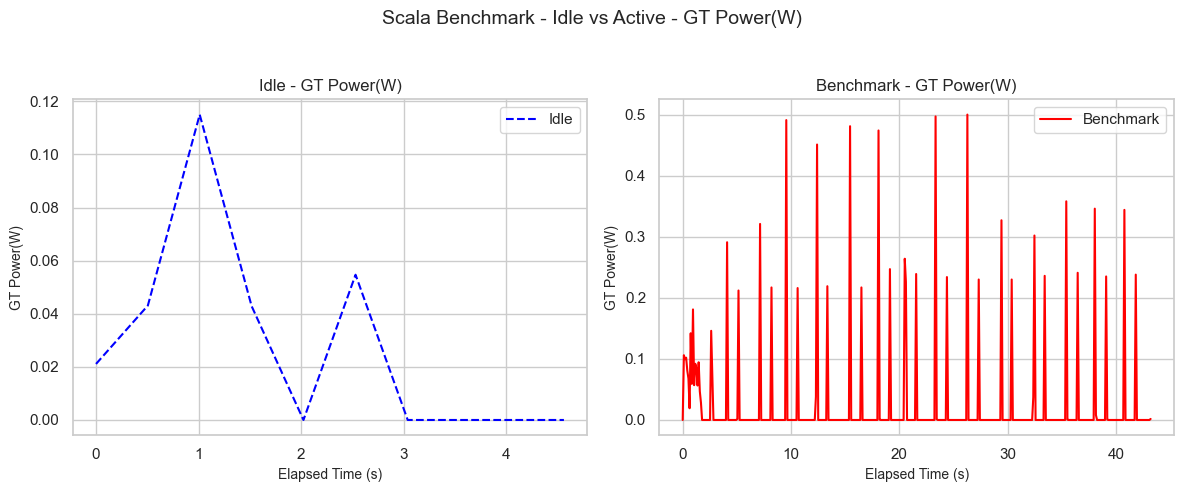

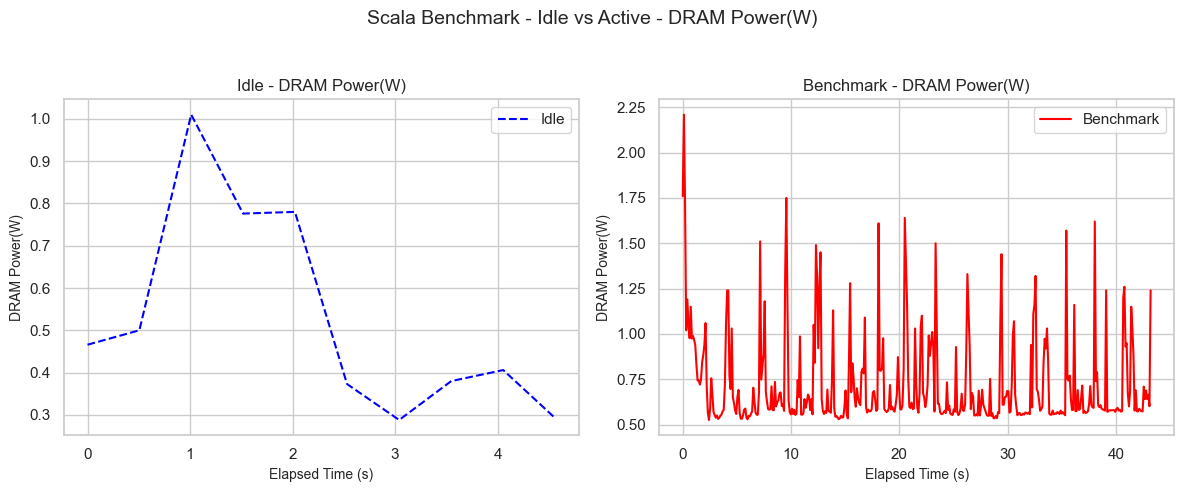

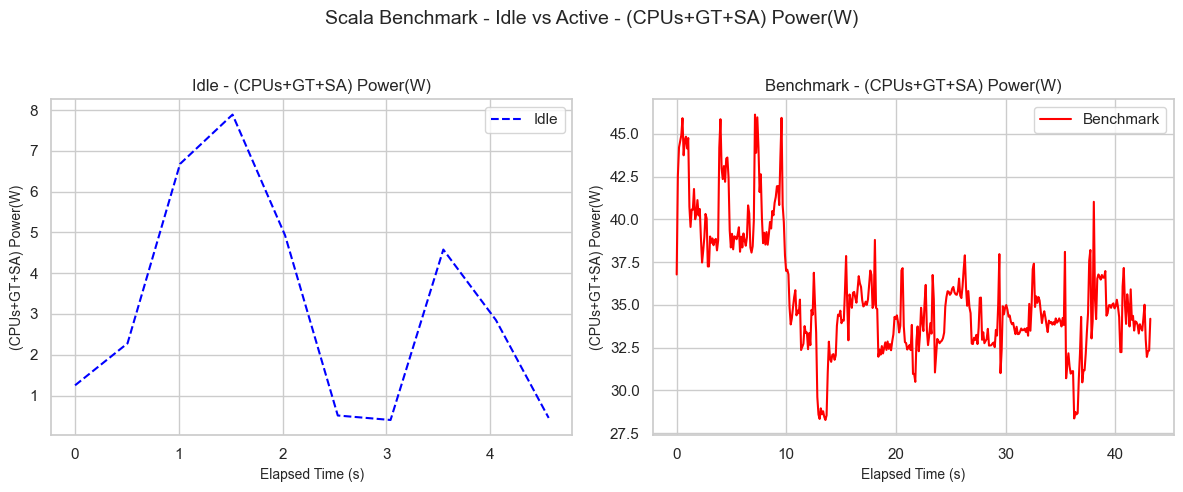

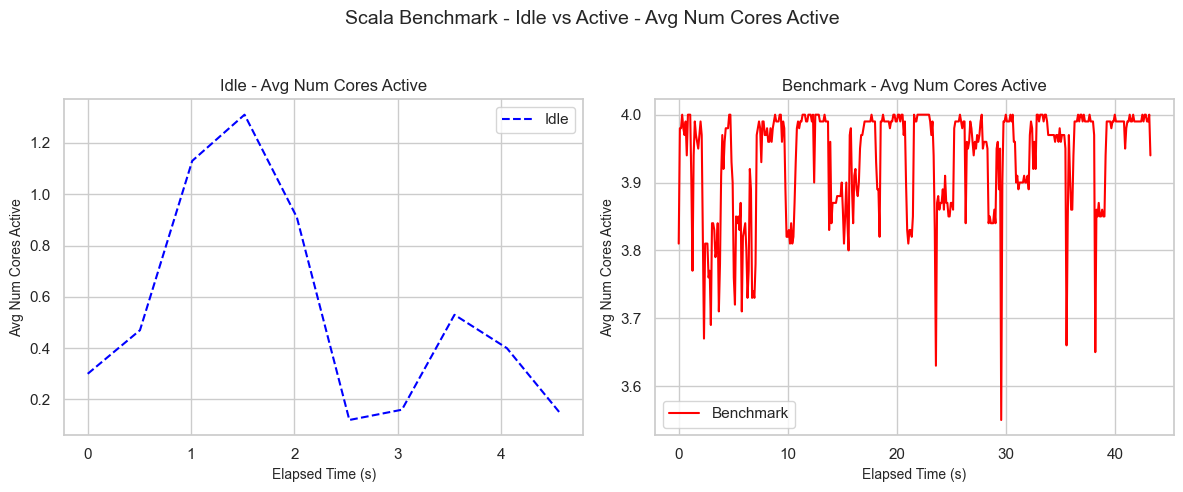

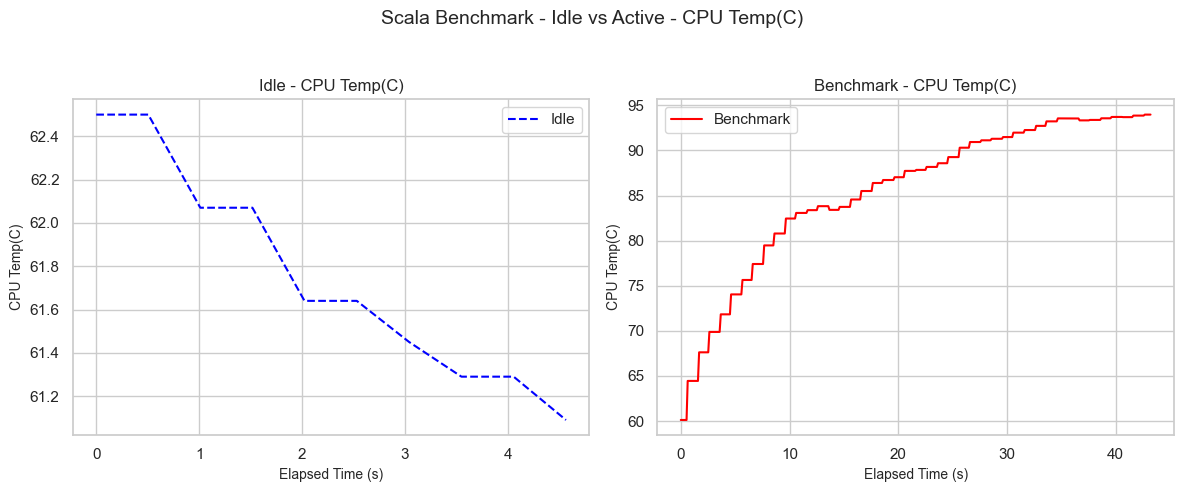

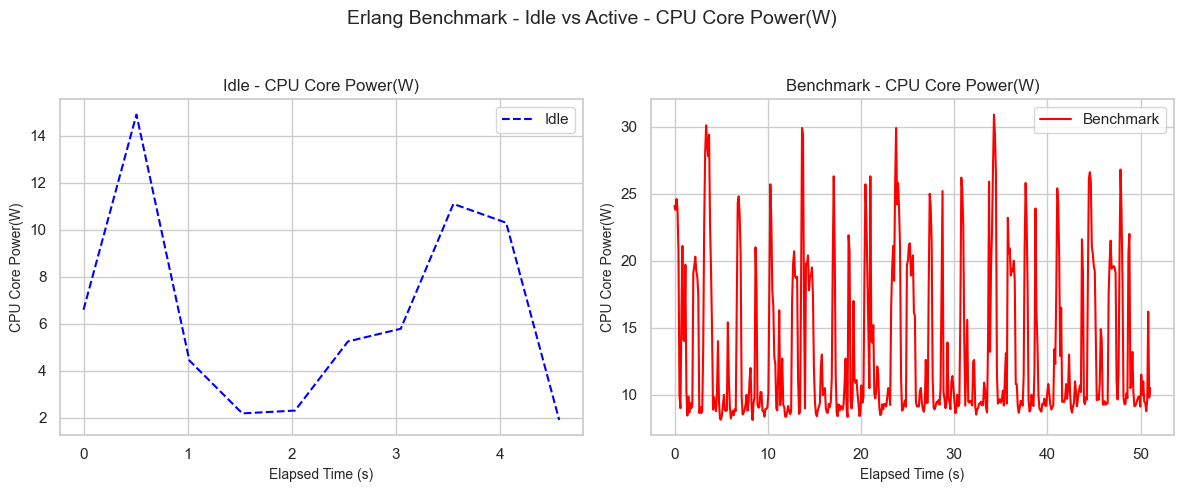

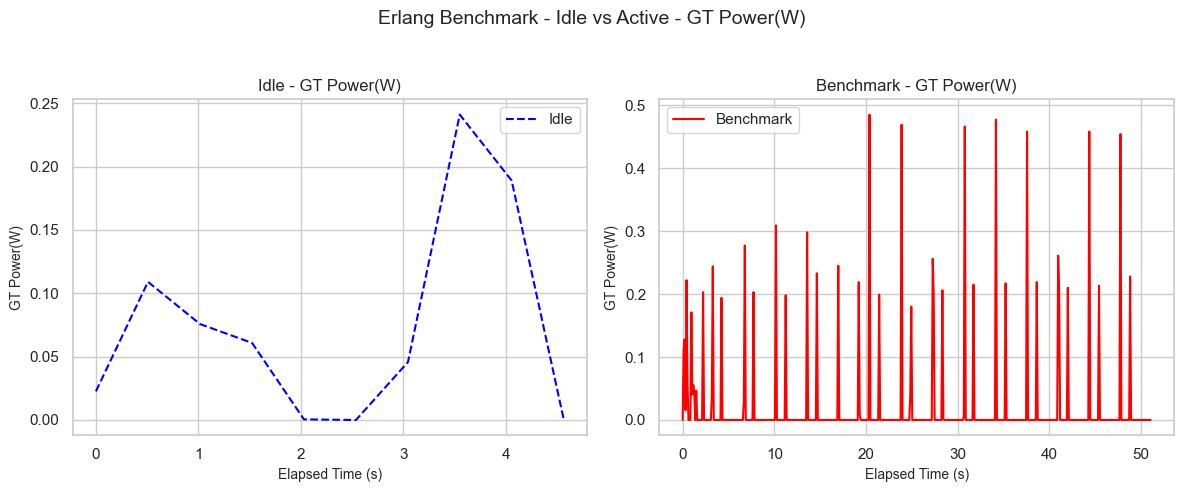

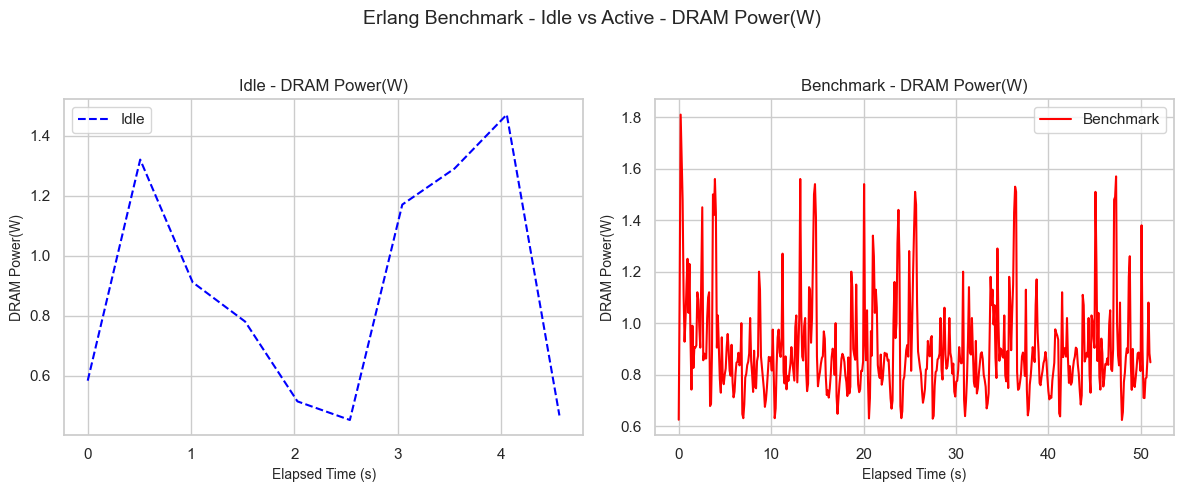

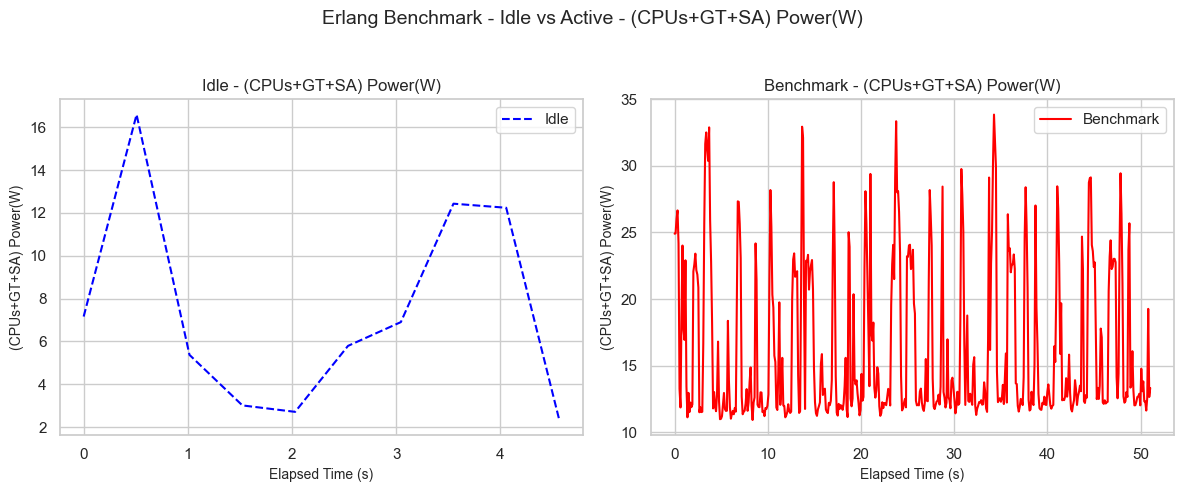

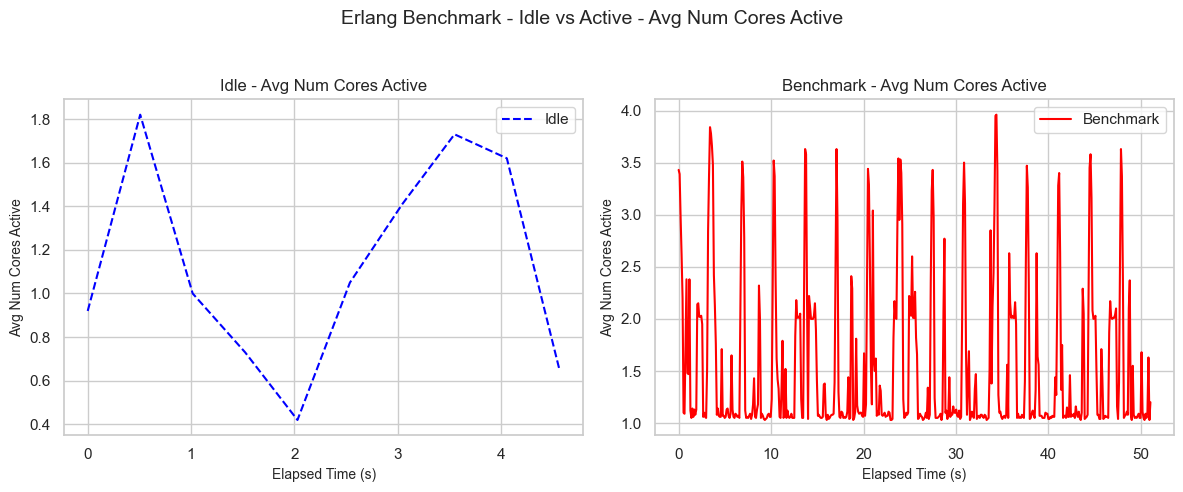

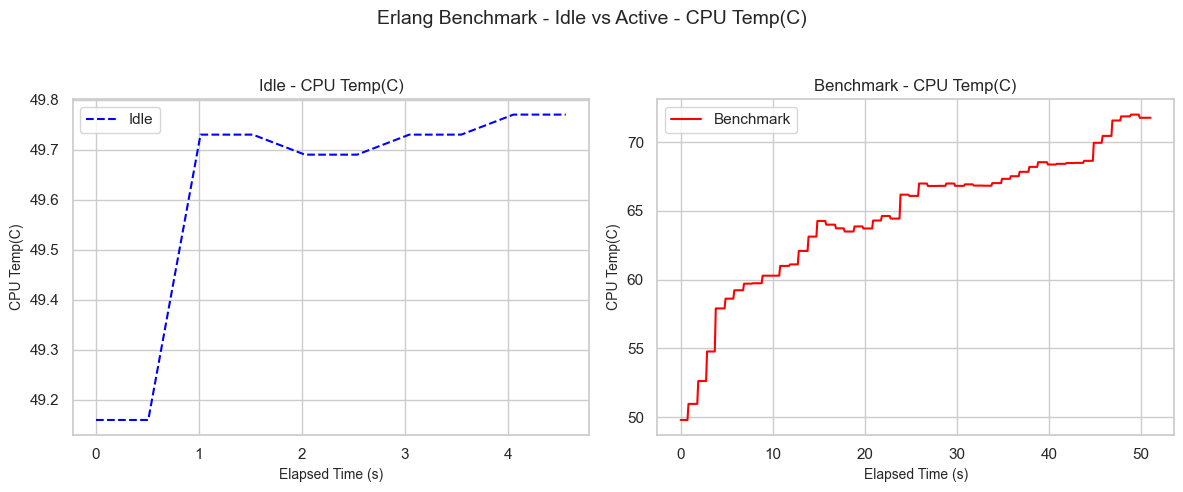

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

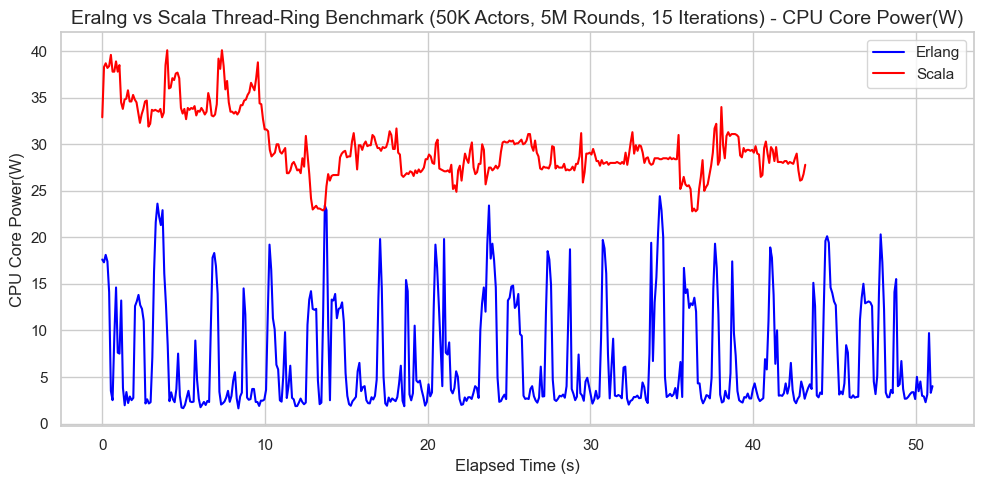

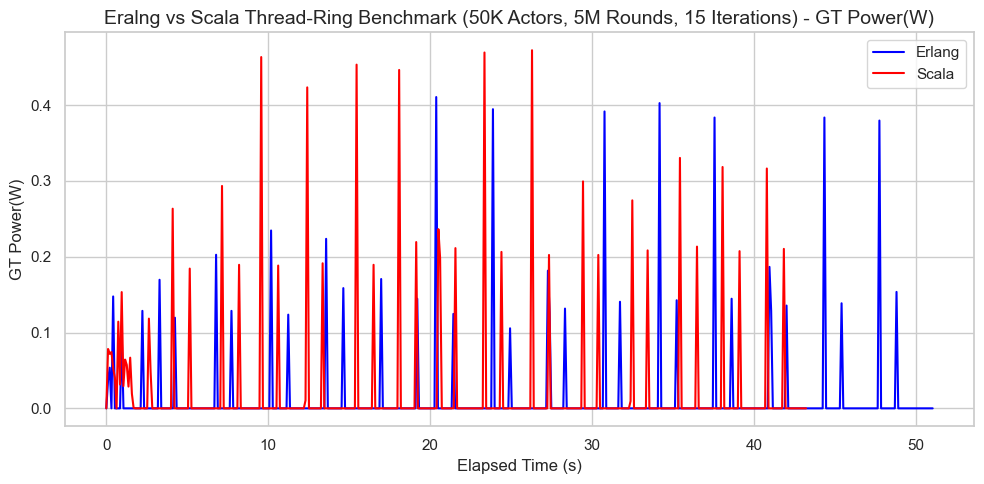

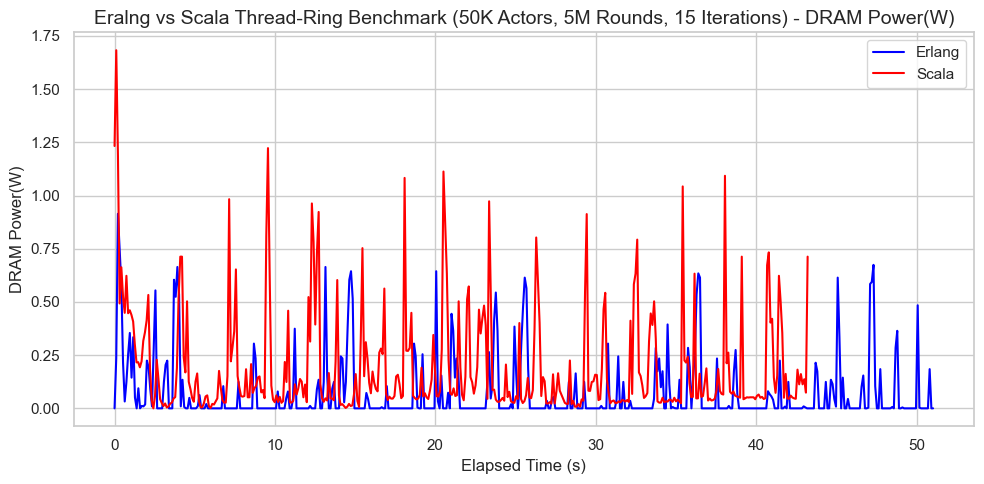

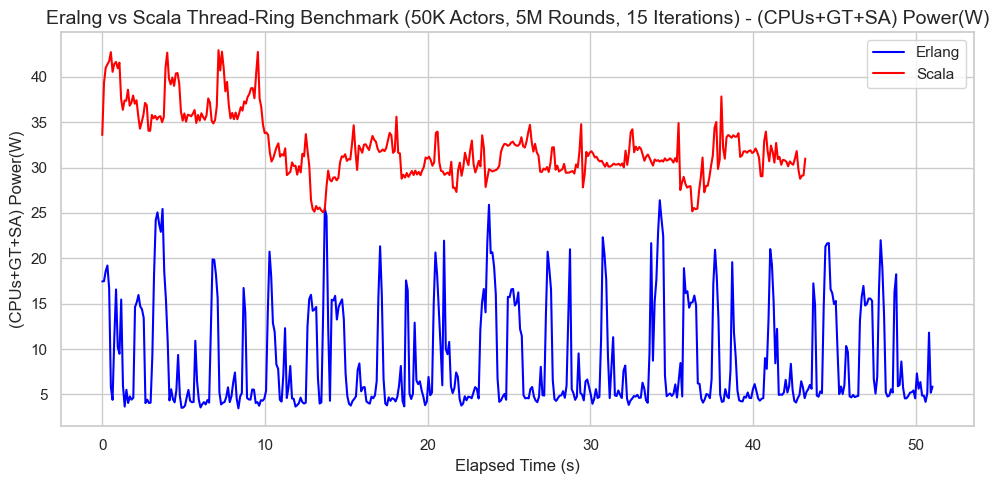

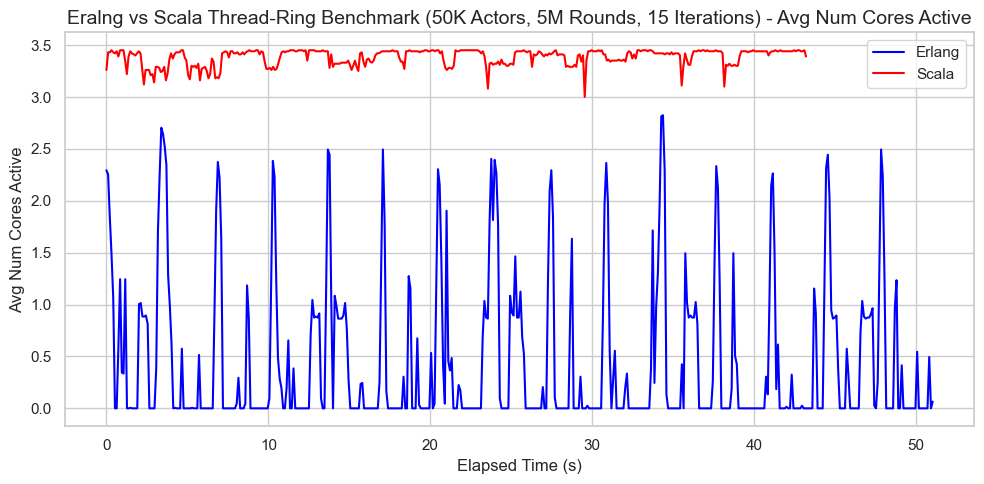

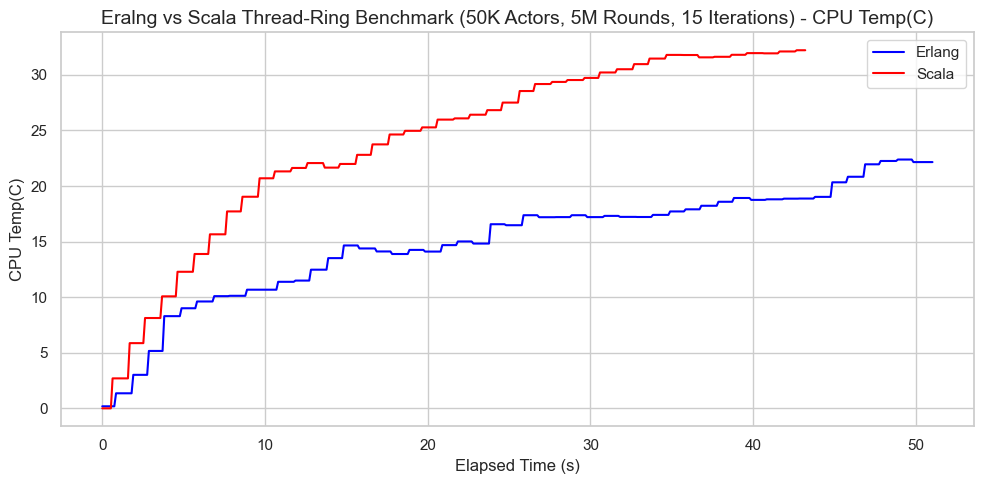

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.840359
GT Power(W)              -0.002162
DRAM Power(W)             0.192038
(CPUs+GT+SA) Power(W)    32.313437
CPU Temp(C)              23.861267
Avg Num Cores Active      3.386175
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)         6.894859
GT Power(W)              -0.054272
DRAM Power(W)             0.009053
(CPUs+GT+SA) Power(W)     8.829158
CPU Temp(C)              15.000452
Avg Num Cores Active      0.415311
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1399.6978802283493 Joules
Erlang Benchmark: 451.48824839564327 Joules
